## Importing the relevant libraries

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, pydot 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz

## Loading the Prostate Cancer dataset

In [45]:
df = pd.read_csv('/content/Prostate_Cancer.csv')
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


## Inspecting and understanding the dataset

In [46]:
df.shape

(100, 10)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [48]:
df.groupby('diagnosis_result').describe().T

diagnosis_result                 B          M
id                count  38.000000  62.000000
                  mean   62.184211  43.338710
                  std    26.590849  28.283079
                  min     2.000000   1.000000
                  25%    50.250000  20.000000
...                            ...        ...
fractal_dimension min     0.053000   0.053000
                  25%     0.059000   0.059000
                  50%     0.063500   0.063000
                  75%     0.069000   0.068750
                  max     0.090000   0.097000

[72 rows x 2 columns]

In [49]:
df.corr()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
id,1.000000,0.047276,0.052263,-0.215953,-0.174354,-0.258328,-0.277554,-0.222334,-0.164946
radius,0.047276,1.000000,0.100245,-0.238216,-0.250934,-0.127121,-0.191490,-0.039707,-0.029120
texture,0.052263,0.100245,1.000000,-0.113453,-0.113725,0.102321,0.032446,0.077912,0.139157
perimeter,-0.215953,-0.238216,-0.113453,1.000000,0.976648,0.269442,0.527542,0.195539,-0.195434
area,-0.174354,-0.250934,-0.113725,0.976648,1.000000,0.208438,0.424950,0.110435,-0.274344
smoothness,-0.258328,-0.127121,0.102321,0.269442,0.208438,1.000000,0.465723,0.424203,0.369580
compactness,-0.277554,-0.191490,0.032446,0.527542,0.424950,0.465723,1.000000,0.681123,0.647953
symmetry,-0.222334,-0.039707,0.077912,0.195539,0.110435,0.424203,0.681123,1.000000,0.568608
fractal_dimension,-0.164946,-0.029120,0.139157,-0.195434,-0.274344,0.369580,0.647953,0.568608,1.000000


## Data Visualization

<Axes: >

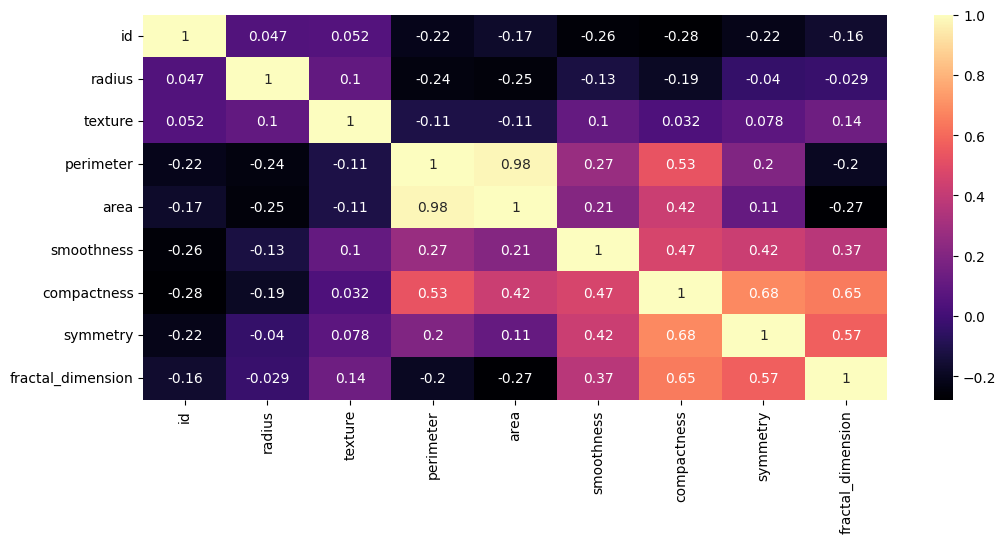

In [50]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True,cmap='magma')

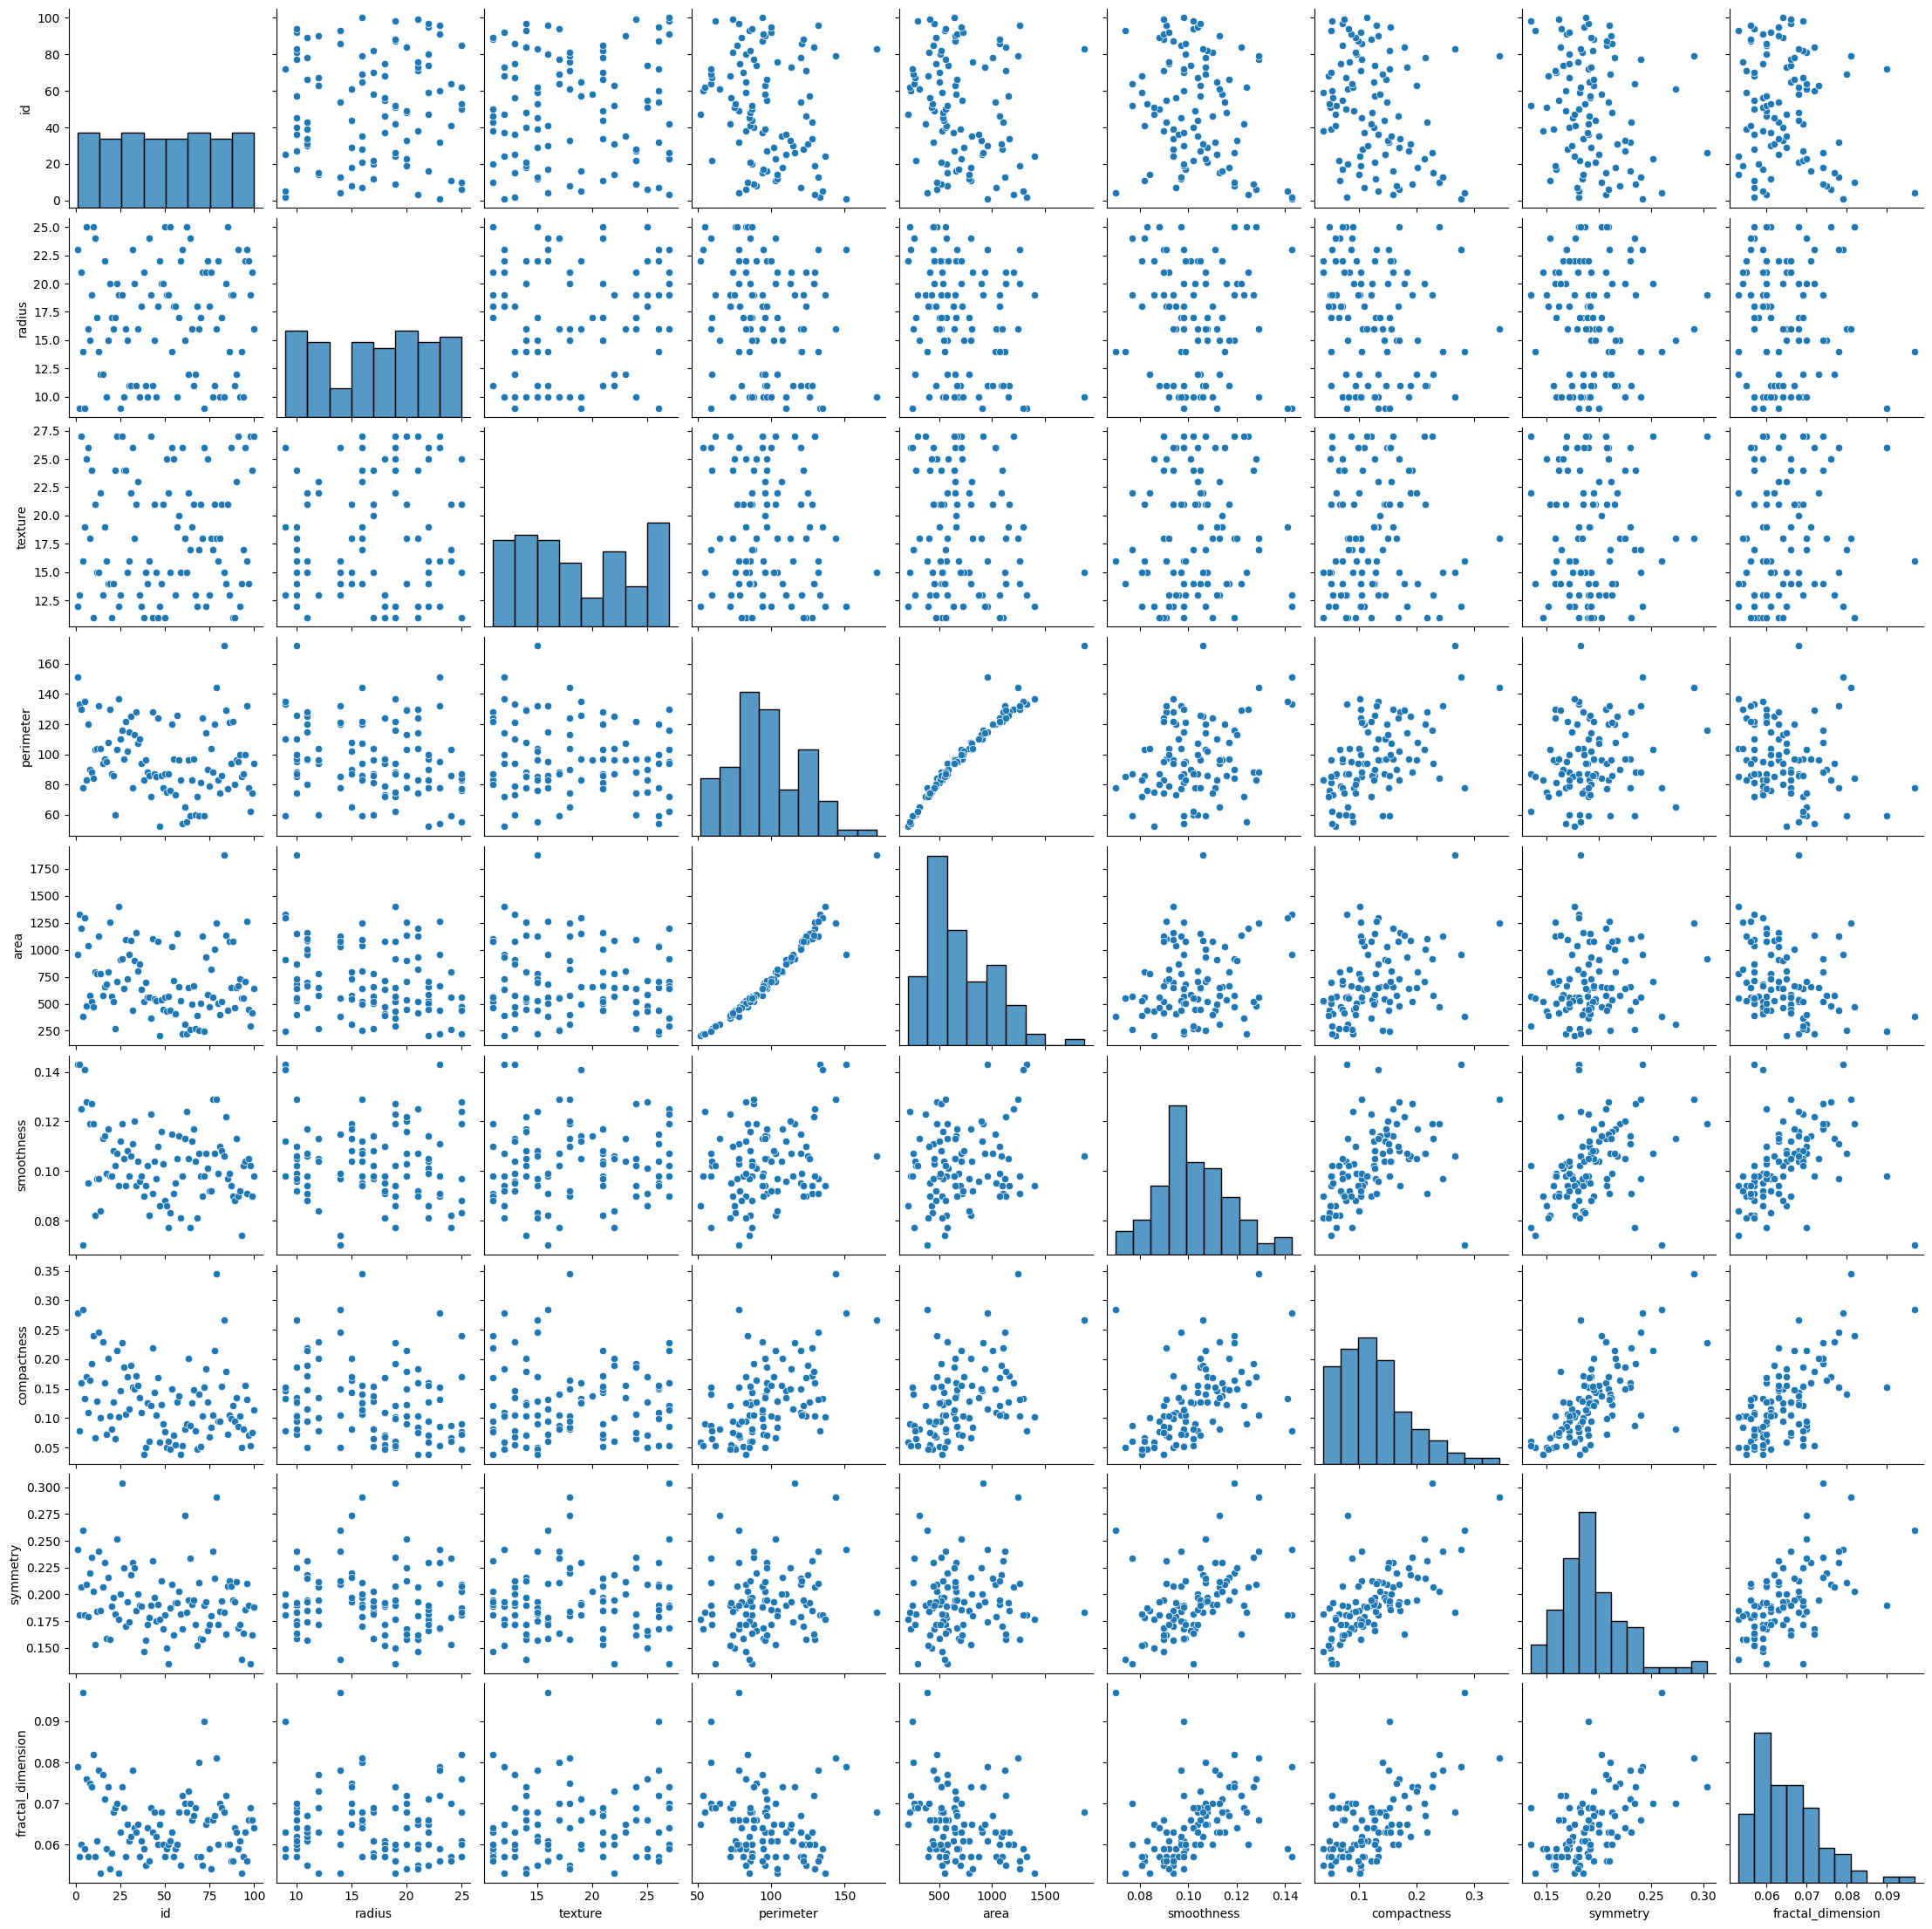

In [51]:
sns.pairplot(df)

## Data Cleaning

In [52]:
df.drop('id',axis=1,inplace=True)

## Creating the testing and training sets

In [53]:
X = df.drop('diagnosis_result',axis=1)
Y = df['diagnosis_result']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.4,random_state=101)

In [54]:
#Normalize the features using StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [55]:
model_accuracies = {}

## Instantiating the K Nearest Neighbors model

In [56]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

## Performing predictions on testing data

In [57]:
predictions = knn.predict(X_test)
predictions

array(['M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B',
       'M'], dtype=object)

## Evaluating the KNN model performance

In [58]:
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
model_accuracies['KNN'] = accuracy_score(y_test,predictions)

0.725
[[12  3]
 [ 8 17]]
              precision    recall  f1-score   support

           B       0.60      0.80      0.69        15
           M       0.85      0.68      0.76        25

    accuracy                           0.73        40
   macro avg       0.72      0.74      0.72        40
weighted avg       0.76      0.72      0.73        40




## Logistic Regression 

In [59]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

## Model predictions and evaluations

In [60]:
lr_pred = logmodel.predict(X_test)
lr_pred

array(['M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M',
       'M'], dtype=object)

In [61]:
print(accuracy_score(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))
model_accuracies['Logistic Regression'] = accuracy_score(y_test,lr_pred)

0.825
[[12  3]
 [ 4 21]]
              precision    recall  f1-score   support

           B       0.75      0.80      0.77        15
           M       0.88      0.84      0.86        25

    accuracy                           0.82        40
   macro avg       0.81      0.82      0.82        40
weighted avg       0.83      0.82      0.83        40



## Decision Tree Classifier

In [62]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Model predictions and evaluations

In [63]:
dtree_pred = dtree.predict(X_test)
dtree_pred

array(['M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'M',
       'M'], dtype=object)

In [64]:
print(accuracy_score(y_test,dtree_pred))
print(confusion_matrix(y_test,dtree_pred))
print(classification_report(y_test,dtree_pred))
model_accuracies['Decision Tree Classifier'] = accuracy_score(y_test,dtree_pred)

0.7
[[10  5]
 [ 7 18]]
              precision    recall  f1-score   support

           B       0.59      0.67      0.62        15
           M       0.78      0.72      0.75        25

    accuracy                           0.70        40
   macro avg       0.69      0.69      0.69        40
weighted avg       0.71      0.70      0.70        40



## Visualizing the decision tree

In [67]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train) #decision tree classifier on the training data, which creates a visualization of the tree 

features = ['radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension']

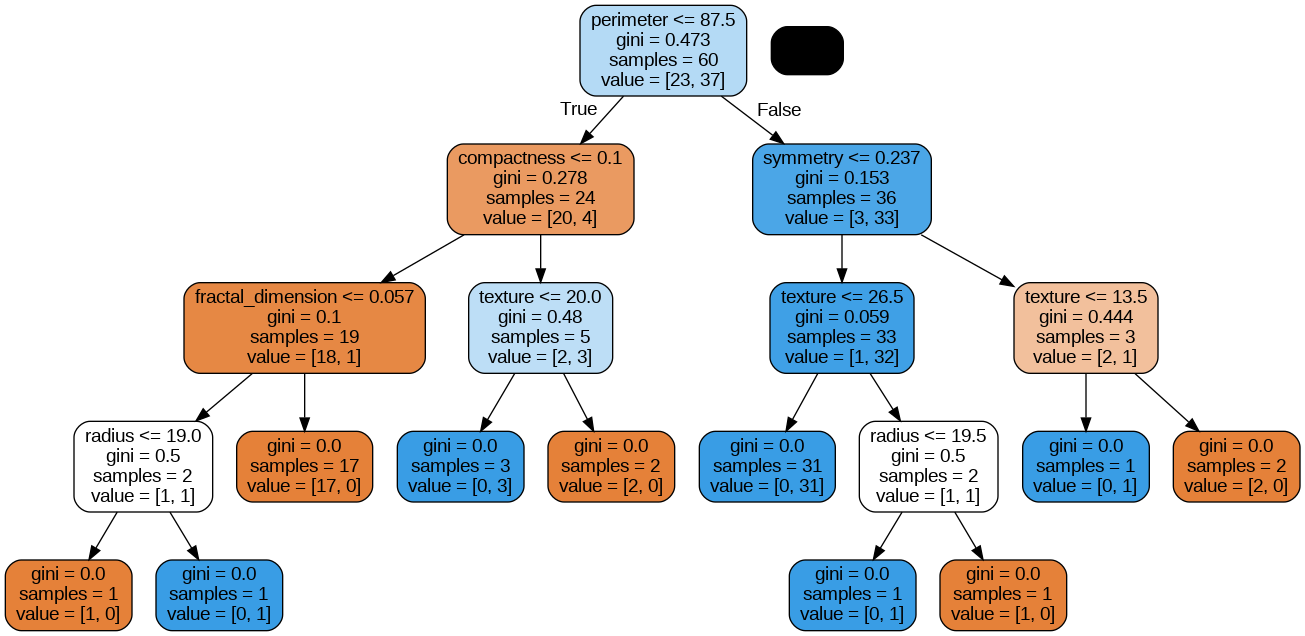

In [68]:
dot_data = StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,rounded=True,filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

## Random Forests Classifier

In [69]:
rfc = RandomForestClassifier(n_estimators=120,n_jobs=3,verbose=1,random_state=101)
rfc.fit(X_train,y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 120 out of 120 | elapsed:    0.3s finished


RandomForestClassifier(n_estimators=120, n_jobs=3, random_state=101, verbose=1)

## Random Forests Classifier Predictions and their Evaluation

In [70]:
rfc_pred = rfc.predict(X_test)
rfc_pred

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 120 out of 120 | elapsed:    0.0s finished


array(['M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M',
       'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M',
       'M'], dtype=object)

In [71]:
print(accuracy_score(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))
model_accuracies['Random Forests Classifier'] = accuracy_score(y_test,rfc_pred)

0.825
[[12  3]
 [ 4 21]]
              precision    recall  f1-score   support

           B       0.75      0.80      0.77        15
           M       0.88      0.84      0.86        25

    accuracy                           0.82        40
   macro avg       0.81      0.82      0.82        40
weighted avg       0.83      0.82      0.83        40



## Gaussian Naive Bayes Classifier

In [72]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

## Gaussian Naive Bayes Predictions and Evaluations

In [73]:
gnb_pred = gnb.predict(X_test)
gnb_pred

array(['B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'M',
       'M'], dtype='<U1')

In [74]:
print(accuracy_score(y_test,gnb_pred))
print(confusion_matrix(y_test,gnb_pred))
print(classification_report(y_test,gnb_pred))
model_accuracies['GNB'] = accuracy_score(y_test,gnb_pred)

0.775
[[13  2]
 [ 7 18]]
              precision    recall  f1-score   support

           B       0.65      0.87      0.74        15
           M       0.90      0.72      0.80        25

    accuracy                           0.78        40
   macro avg       0.78      0.79      0.77        40
weighted avg       0.81      0.78      0.78        40



## Support Vector Machines(SVM)

In [75]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

## SVM Predictions and Evaluations

In [76]:
svm_pred = svm.predict(X_test)
svm_pred

array(['M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M',
       'M'], dtype=object)

In [77]:
print(accuracy_score(y_test,svm_pred))
print(confusion_matrix(y_test,svm_pred))
print(classification_report(y_test,svm_pred))
model_accuracies['Untuned SVC'] = accuracy_score(y_test,svm_pred)

0.775
[[13  2]
 [ 7 18]]
              precision    recall  f1-score   support

           B       0.65      0.87      0.74        15
           M       0.90      0.72      0.80        25

    accuracy                           0.78        40
   macro avg       0.78      0.79      0.77        40
weighted avg       0.81      0.78      0.78        40



## Hyperparameter Tuning by GridSearchCV

In [78]:
param_grid = {'C': [0.1,1,10,100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [79]:
grid_search = GridSearchCV(SVC(),param_grid,verbose=3,refit=True)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.583 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.583 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.583 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.583 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.583 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.583 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [80]:
grid_search.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [81]:
grid_search.best_estimator_

SVC(C=1, gamma=0.0001)

## GridSearchCV Tuned SVM Predictions and Evaluations

In [82]:
grid_search_pred = grid_search.predict(X_test)
grid_search_pred

array(['M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'M',
       'M'], dtype=object)

In [83]:
print(accuracy_score(y_test,grid_search_pred))
print(confusion_matrix(y_test,grid_search_pred))
print(classification_report(y_test,grid_search_pred))

0.8
[[12  3]
 [ 5 20]]
              precision    recall  f1-score   support

           B       0.71      0.80      0.75        15
           M       0.87      0.80      0.83        25

    accuracy                           0.80        40
   macro avg       0.79      0.80      0.79        40
weighted avg       0.81      0.80      0.80        40



In [84]:
model_accuracies['GridSearchCV Tuned SVC'] = accuracy_score(y_test,grid_search_pred)

# Conclusion

In [85]:
print("Performance of ML Algorithms:")
print('Logistic Regression:', str(np.round(model_accuracies['Logistic Regression']*100,2)) + ' %')
print('Decision Tree Classifier:', str(np.round(model_accuracies['Decision Tree Classifier']*100,2)) + ' %')
print('Random Forests Classifier:', str(np.round(model_accuracies['Random Forests Classifier']*100,2)) + ' %')
print('Gaussian Naive Bayes:', str(np.round(model_accuracies['GNB']*100,2)) + ' %')
print('Support Vector Machines:', str(np.round(model_accuracies['Untuned SVC']*100,2)) + ' %')
print('GridSearchCV Tuned SVM:', str(np.round(model_accuracies['GridSearchCV Tuned SVC']*100,2)) + ' %')

Performance of ML Algorithms:
Logistic Regression: 82.5 %
Decision Tree Classifier: 70.0 %
Random Forests Classifier: 82.5 %
Gaussian Naive Bayes: 77.5 %
Support Vector Machines: 77.5 %
GridSearchCV Tuned SVM: 80.0 %


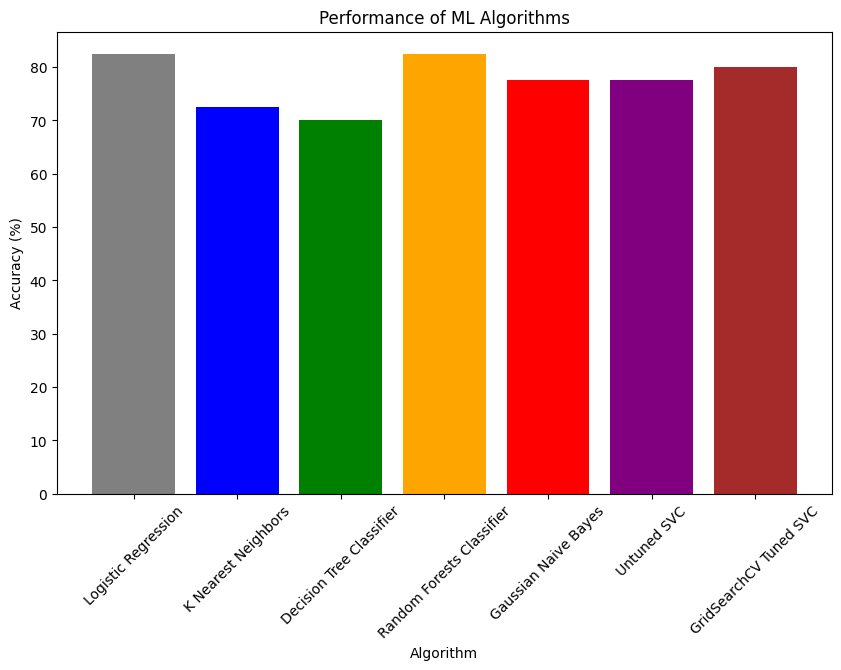

In [86]:
#graph to plot the accuracy of the ml algorithms

model_names = ['Logistic Regression', 'K Nearest Neighbors', 'Decision Tree Classifier',
               'Random Forests Classifier', 'Gaussian Naive Bayes', 'Untuned SVC','GridSearchCV Tuned SVC']

model_accuracies = [model_accuracies['Logistic Regression'], model_accuracies['KNN'], 
                    model_accuracies['Decision Tree Classifier'], model_accuracies['Random Forests Classifier'], 
                    model_accuracies['GNB'], model_accuracies['Untuned SVC'], 
                    model_accuracies['GridSearchCV Tuned SVC']]

model_accuracies = [round(acc * 100, 2) for acc in model_accuracies]

colors = ['gray', 'blue', 'green', 'orange', 'red', 'purple', 'brown']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(model_names, model_accuracies, color=colors)
ax.set_title('Performance of ML Algorithms')
ax.set_xlabel('Algorithm')
ax.set_ylabel('Accuracy (%)')
plt.xticks(rotation=45)

plt.show()


# Logistic Regression and Random Forests Classifier algorithms perform the prostate cancer predictions to the highest level of accuracy although K Nearest Neighbors algorithm couldn't provide precise predictions.